In [12]:
# We are going to be recreating the same experiment as in the past tutorial, so we will use the same commands:
import numpy as np
from qiskit import *
%matplotlib inline

# Now we create te qubits and the circuit
q = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)

In [13]:
# Now we apply the gates

# First we create our initial state
circ.h(q[0])

In [14]:
# The Larmor frequency
w=18.1 # (GHz)

# The times that are going to be considered
ti=0 # (ns)
tN=1 # (ns)
dt=0.05 # (ns)

# And create the time evolution program
while ti<tN:  
    t = ti + dt
    circ.u1(-w*dt,q[0]) 
    ti = t

In [15]:
# Next we add the classical bits and complete the circuit
c = ClassicalRegister(1, 'c')
meas = QuantumCircuit(q, c)
meas.barrier(q)
meas.measure(q,c)
qc = circ + meas

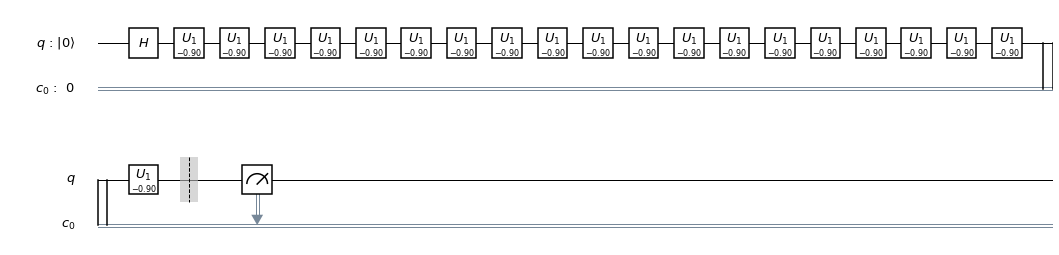

In [16]:
# We will show the circuit too to keep track of what we are doing
qc.draw(output='mpl')
# Complex circuit

In [17]:
# Now we use the quantum computer

from qiskit import IBMQ

# And load our credentials

IBMQ.load_accounts()

/anaconda3/envs/qiskitjorge/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [18]:
# The best available backend

from qiskit.providers.ibmq import least_busy

usefulbackends=IBMQ.backends(filters=lambda x: x.configuration().n_qubits >= 1 and
                                                       not x.configuration().simulator)
backend=least_busy(usefulbackends)

print("The best backend is " + backend.name())

The best backend is ibmqx2


In [19]:
# Now we execute our circuit

from qiskit.tools.monitor import job_monitor

max_credits = 3

shots = 2048

job=execute(qc, backend=backend, shots=shots, max_credits=max_credits)

# In order to see when the simulation is done

job_monitor(job)

Job Status: job has successfully run


In [20]:
# Now we extract the data

result = job.result()

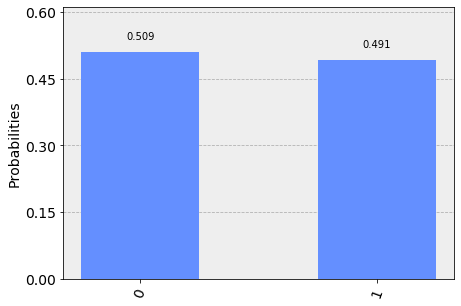

In [21]:
# And we draw the results
counts=result.get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)